In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [4]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [5]:
Nbins_inu = 10
Nbins2_inu = 20
Nbins3_inu = 30
Nbins4_inu = 40
Nbins5_inu = 50
Nbins6_inu = 60
G_eff_vec = [1e-4, 1e-3, 1e-2, 1e-1]
cvis2_vec = [1./4., 1./8.,0]
qmax_vec=[12.,15.,18.]
Nq_vec = [15.,30.,60.,150.]

In [6]:
Standard = Class() 
Standard.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.00, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'G_eff_CYR' : 0.0,
           'tol_inu_synchronous' : Nbins_inu,
           'ur_fluid_approximation':3,
           'radiation_streaming_approximation':3,
           'background_verbose':5
             }) 
Standard.compute()

In [7]:
NoInt = Class() 
NoInt.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0., 
           'tol_inu_synchronous' : 15.,
           'l_max_inu':15,
           'qmax_inu':15.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
NoInt.compute()

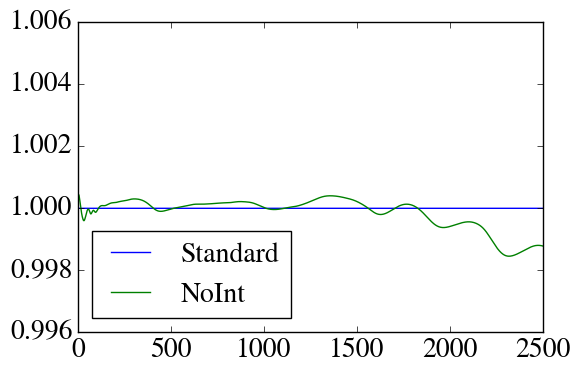

In [6]:
PlotModels = ['Standard','NoInt']
RefModel = 'Standard'

for M in PlotModels:
    exec('cosmo = '+M)
    exec('ref = '+RefModel)
    cl = cosmo.raw_cl()
    clref = ref.raw_cl()
    l = cl['ell'][2:]
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:],label=M)
plt.ylim([0.996,1.006])
plt.legend(loc='lower left')
#plt.savefig("StandardNoInt.pdf", bbox_inches='tight')

cosmo = Class()
cosmo.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0,
           'N_inu': 3.0,
           'N_ur' : 0.0,
           'YHe' : 0.25,
           'k_output_values' : '1e-4, 1e-2, 1.0',
           'G_eff' : 1e-7,
           'tol_inu_synchronous' : 1e-1})
cosmo.compute()

In [8]:
CYR = {}
for G in [1e-3, 1e-2, 5e-2]:
    CYR[G] = Class() 
    CYR[G].set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff_CYR' : G, 
           'tol_inu_synchronous' : Nbins_inu,
             'ur_fluid_approximation':3,
             'radiation_streaming_approximation':3,
              'background_verbose':5
             }) 
    CYR[G].compute()

In [9]:
Cvis2Ceff2 = {}
for cvis2 in cvis2_vec:
    Cvis2Ceff2[cvis2] = Class() 
    Cvis2Ceff2[cvis2].set({'output':'tCl mPk dTk vTk', 
               'N_ncdm' : 0, 
               'N_inu': 0.0, 
               'N_ur' : 3.0, 
               'ceff2_ur': 1./3.,
               'cvis2_ur' : cvis2,
               'YHe' : 0.25, 
               'k_output_values' : '1e-4, 1e-2, 1.0', 
               'G_eff' : 0.0, 
               'tol_inu_synchronous' : Nbins_inu,
                 'ur_fluid_approximation':3,
                 'radiation_streaming_approximation':3,
                'background_verbose':5
                 }) 
    Cvis2Ceff2[cvis2].compute()

In [9]:
ISA = {}
for G in [1e-3, 1e-2, 5e-2]:
    ISA[G]= Class() 
    ISA[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'qmax_inu':15.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
           'tol_inu_synchronous' : 15.,
           'l_max_inu':15,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA[G].compute()

CPU times: user 5min 19s, sys: 260 ms, total: 5min 19s
Wall time: 1min 21s
CPU times: user 7min 36s, sys: 440 ms, total: 7min 37s
Wall time: 1min 56s
CPU times: user 9min 40s, sys: 512 ms, total: 9min 41s
Wall time: 2min 27s


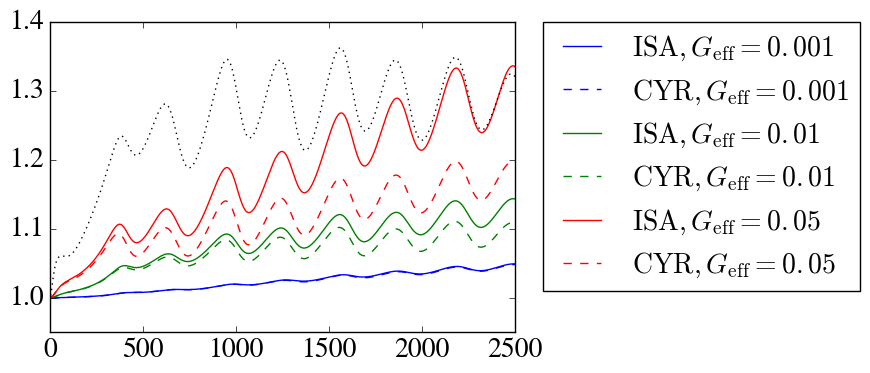

In [11]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in [1e-3, 1e-2,5e-2]:
    cl_CYR = CYR[G].raw_cl()
    cl_ISA = ISA[G].raw_cl()
    l = cl_ISA['ell'][2:]
    p = plt.plot(l,cl_ISA['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{ISA}, G_\mathrm{eff}='+"{:g}".format(G)+'$')
    colour = p[0].get_color()
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',
             ls='--',color=colour)
#plt.ylim([0.997,1.003])
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))

for cvis2 in [0.]: 
    cl_cvis2 = Cvis2Ceff2[cvis2].raw_cl()
    plt.plot(l,cl_cvis2['tt'][2:]/clref['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls=':',color="Black")
    
#plt.ylim([0.997,1.003])

#plt.savefig("CYRvsISA_NEW(15_30).pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

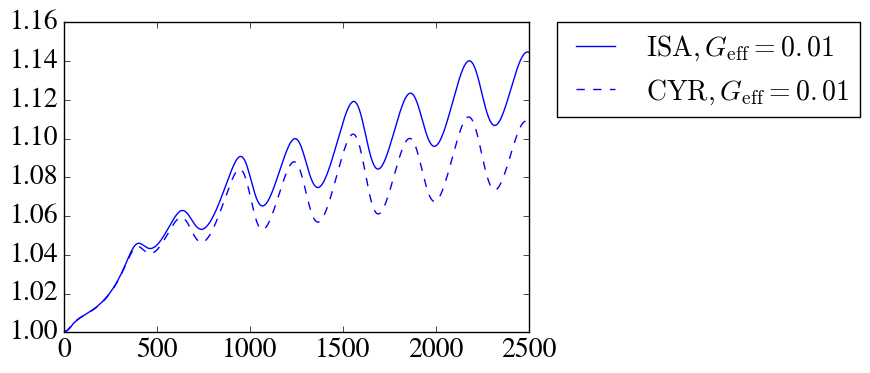

In [12]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in [1e-2]:
    cl_CYR = CYR[G].raw_cl()
    cl_ISA = ISA[G].raw_cl()
    l = cl_ISA['ell'][2:]
    p = plt.plot(l,cl_ISA['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{ISA}, G_\mathrm{eff}='+"{:g}".format(G)+'$')
    colour = p[0].get_color()
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',
             ls='--',color=colour)
#plt.ylim([0.997,1.003])
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
#plt.savefig("CYRvsISA.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
#ptsInt1 = Int1.get_perturbations()['scalar']
ptsNoInt = NoInt.get_perturbations()['scalar']
plotvar = 'inu_momentum_conservation'
for G in [1e-3]:
    ptsISA5 = ISA5[G].get_perturbations()['scalar']
    for i in range(1):
        tauISA5 = ptsISA5[i]['z']
        varISA5 = ptsISA5[i][plotvar]
        
        plt.plot(tauISA5,varISA5,ls='-',lw=2,label=r'$G_\mathrm{eff}='+"{:g}".format(G)+'$')
                 
        lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))    

In [22]:
ISAqmax = {}
for Geff in [5e-2]:
    for qmax in [15.,18.,21.]:
        ISAqmax[Geff,qmax]= Class() 
        ISAqmax[Geff,qmax].set({'output':'tCl mPk dTk vTk',
              'evolver':1,
               'N_ncdm' : 0, 
               'N_inu': 3.0, 
               'N_ur' : 0.0, 
               'YHe' : 0.25, 
               'k_output_values' : '1e-4, 1e-2, 1.0', 
               'G_eff' : Geff, 
               'tol_inu_synchronous' : qmax,
               'qmax_inu':qmax,
               'qmin_inu':0.1,
               'quadrature_method_inu':1,
               'l_max_inu':15,
#          'tol_perturb_integration':10000,
            'perturbations_verbose':3}) 
        %time ISAqmax[Geff,qmax].compute()

CPU times: user 9min 22s, sys: 468 ms, total: 9min 23s
Wall time: 2min 29s
CPU times: user 14min 10s, sys: 612 ms, total: 14min 11s
Wall time: 3min 36s
CPU times: user 19min 47s, sys: 1.43 s, total: 19min 48s
Wall time: 5min 17s


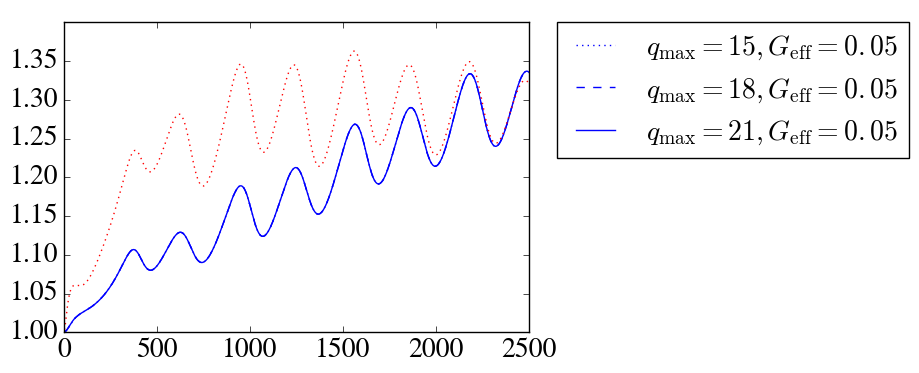

In [26]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

import matplotlib.pyplot as plt
from itertools import cycle
colors = ["Blue","Green","Red","Cyan"]
lines = [":","--","-"]
linecycler = cycle(lines)
colorcycler = cycle(colors)

for Geff in [5e-2]:    
    colour = next(colorcycler)
    for qmax in [15.,18.,21.]:
        linestyle = next(linecycler)
        cl_ISAqmax = ISAqmax[Geff,qmax].raw_cl()
        l = cl_ISAqmax['ell'][2:]
        plt.plot(l,cl_ISAqmax['tt'][2:]/clref['tt'][2:],linestyle,color=colour,label=r'$q_\mathrm{max}='+"{:g}".format(qmax)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$')
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))      

for cvis2 in [0.]: 
    cl_cvis2 = Cvis2Ceff2[cvis2].raw_cl()
    plt.plot(l,cl_cvis2['tt'][2:]/clref['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls=':',color="Red")
    
#plt.savefig("VarqmaxGeffe1_NEW.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')

In [10]:
ISANq = {}
for Geff in [1e-3, 1e-2, 5e-2]:
    for Nq in [15.,30.,60.]:
        ISANq[Geff,Nq]= Class() 
        ISANq[Geff,Nq].set({'output':'tCl mPk dTk vTk',
              'evolver':1,
               'N_ncdm' : 0, 
               'N_inu': 3.0, 
               'N_ur' : 0.0, 
               'YHe' : 0.25, 
               'k_output_values' : '1e-4, 1e-2, 1.0', 
               'G_eff' : Geff, 
               'tol_inu_synchronous' : Nq,
               'qmax_inu':20.,
               'qmin_inu':0.1,
               'quadrature_method_inu':1,
               'l_max_inu':15,
#          'tol_perturb_integration':10000,
            'perturbations_verbose':3}) 
        %time ISANq[Geff,Nq].compute()

CPU times: user 5min 17s, sys: 264 ms, total: 5min 18s
Wall time: 1min 21s
CPU times: user 21min 2s, sys: 680 ms, total: 21min 2s
Wall time: 5min 20s
CPU times: user 1h 38min 59s, sys: 10.9 s, total: 1h 39min 10s
Wall time: 25min 5s
CPU times: user 7min 36s, sys: 404 ms, total: 7min 36s
Wall time: 1min 56s
CPU times: user 32min 47s, sys: 856 ms, total: 32min 48s
Wall time: 8min 26s
CPU times: user 2h 52min 46s, sys: 10.1 s, total: 2h 52min 56s
Wall time: 44min 23s
CPU times: user 9min 21s, sys: 296 ms, total: 9min 21s
Wall time: 2min 23s
CPU times: user 43min 46s, sys: 416 ms, total: 43min 47s
Wall time: 11min 8s
CPU times: user 4h 11min 27s, sys: 9.93 s, total: 4h 11min 37s
Wall time: 1h 4min 29s


KeyError: (0.1, 40.0)

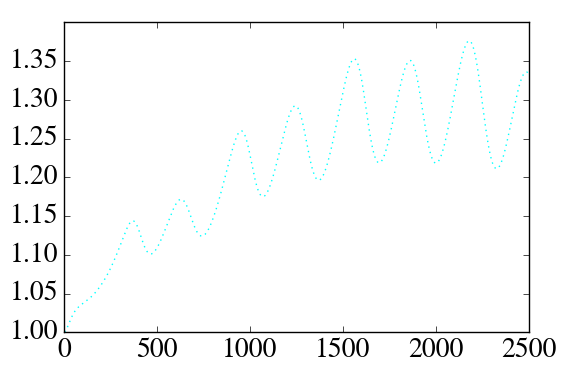

In [13]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

import matplotlib.pyplot as plt
from itertools import cycle
colors = ["Blue","Green","Red","Cyan"]
lines = [":","--","-"]
linecycler = cycle(lines)
colorcycler = cycle(colors)

for Geff in [1e-1]:    
    for qmax in [20.,40.]:
        linestyle = next(linecycler)
        cl_ISAqmax = ISAqmax[Geff,qmax].raw_cl()
        l = cl_ISAqmax['ell'][2:]
        plt.plot(l,cl_ISAqmax['tt'][2:]/clref['tt'][2:],linestyle,color="Cyan",label=r'$q_\mathrm{max}='+"{:g}".format(qmax)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$')
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))      

for cvis2 in [0.]: 
    cl_cvis2 = Cvis2Ceff2[cvis2].raw_cl()
    plt.plot(l,cl_cvis2['tt'][2:]/clref['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls=':',color="Black")
    
plt.savefig("VarqmaxGeff1.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')

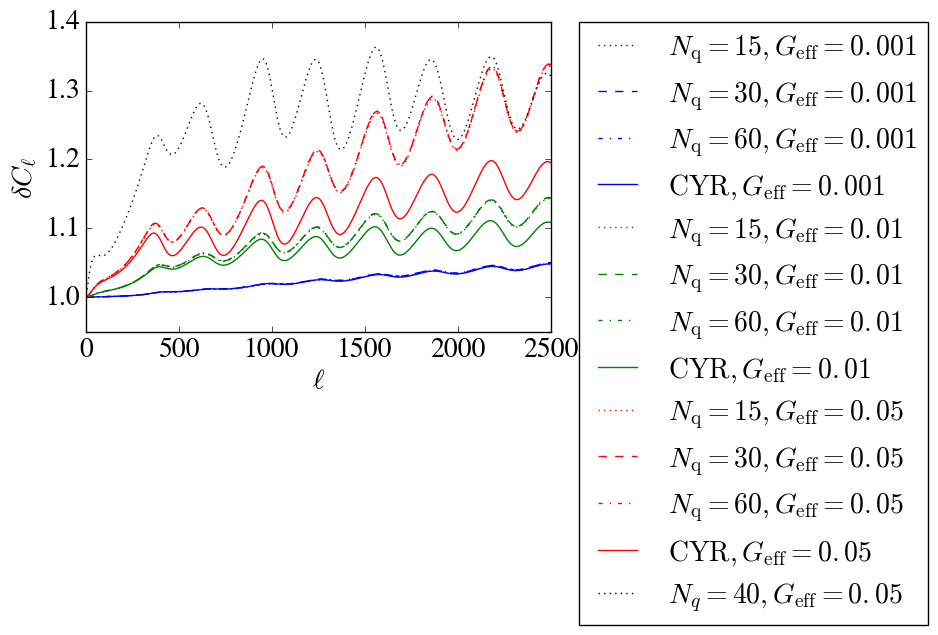

In [21]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

import matplotlib.pyplot as plt
from itertools import cycle
colors = ["Blue","Green","Red","Cyan"]
lines = [":","--","-."]
linecycler = cycle(lines)
colorcycler = cycle(colors)

for Geff in [1e-3,1e-2,5e-2]:
    colour = next(colorcycler)
    cl_CYR = CYR[Geff].raw_cl()
    for Nq in [15.,30.,60.]:
        linestyle = next(linecycler)
        cl_ISANq = ISANq[Geff,Nq].raw_cl()
        l = cl_ISANq['ell'][2:]
        plt.xlabel('$\ell$')
        plt.ylabel('$\delta C_{\ell}$')
        plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:],linestyle,color=colour,label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$')
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],color=colour,label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(Geff)+'$')    

for cvis2 in [0.]: 
    cl_cvis2 = Cvis2Ceff2[cvis2].raw_cl()
    plt.plot(l,cl_cvis2['tt'][2:]/clref['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls=':',color="Black")
    
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045)) 
#plt.savefig("Geffe3_varNqB.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')

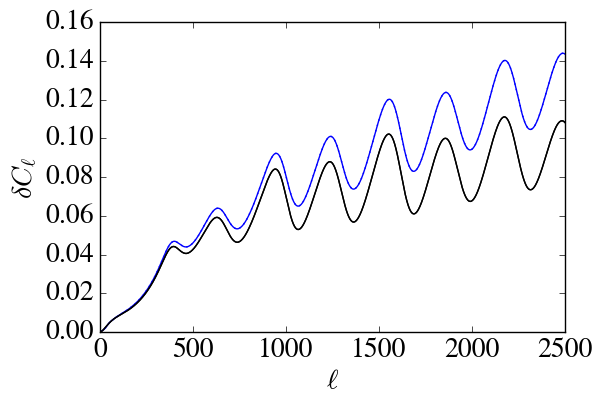

In [67]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

import matplotlib.pyplot as plt
from itertools import cycle
colors = ["Blue","Green","Red"]
lines = ["-",":","--"]
linecycler = cycle(lines)
colorcycler = cycle(colors)

for Geff in [1e-2]:
    colour = next(colorcycler)
    cl_CYR = CYR[Geff].raw_cl()
    for qmax in [150.,300.]:
        linestyle = next(linecycler)
        cl_ISANq = ISANq[Geff,Nq].raw_cl()
        l = cl_ISANq['ell'][2:]
        plt.xlabel('$\ell$')
        plt.ylabel('$\delta C_{\ell}$')
        plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:]-1.,linestyle,color=colour,label=r'exact approach')
        plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:]-1.,color="Black",label=r'rel time approx.')    

#lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045)) 
#plt.savefig("VarNq_NEW.pdf",bbox_extra_artists=(lgd,))

358 353 125067
1862 1566 125067
159253 124531 125067


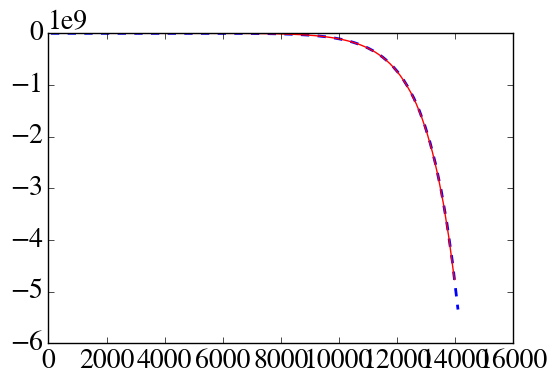

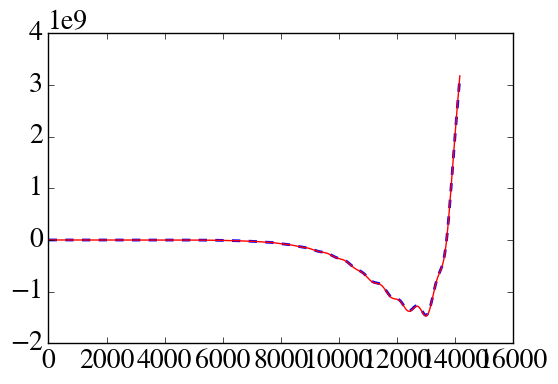

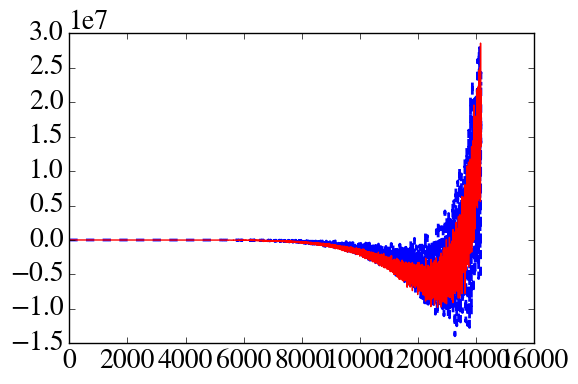

In [90]:
ptsNoInt = NoInt.get_perturbations()['scalar']
ptsStandard = Standard.get_perturbations()['scalar']
ptsISA = ISA[1e-2].get_perturbations()['scalar']

plotvar = 'delta'

for i in range(3):
    plt.figure()
    tauISA = ptsISA[i]['tau [Mpc]']
    tauNoInt = ptsNoInt[i]['tau [Mpc]']
    #tauStandard = ptsStandard[i]['tau [Mpc]']
    
    varISA = ptsISA[i][plotvar+'_inu']
    varNoInt = ptsNoInt[i][plotvar+'_inu']
    #varStandard = ptsStandard[i][plotvar+'_ur']
    
    #colour = p[0].get_color()
    plt.plot(tauNoInt,varNoInt,ls='--',color='Blue',lw=2)
    p = plt.plot(tauISA,varISA,color='Red')
    #plt.plot(tauStandard,varStandard,ls=':',color='Green',lw=5)
    print len(tauISA),len(tauNoInt),len(tauStandard)

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
lines = ["-.",":","--","-"]
linecycler = cycle(lines)

Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

for Geff in [1e-2]:
    cl_CYR = CYR[Geff].raw_cl()
    for Nq in Nq_vec:
        #plt.xlabel('$\ell$')
        #plt.ylabel('$\delta C_{\ell}$')
        cl_ISANq = ISANq[Geff,Nq].raw_cl()
        l = cl_ISANq['ell'][2:]
        plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Green")
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Black")    

lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045)) 
#plt.savefig("Geffe2_varNq.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
lines = ["-.",":","--","-"]
linecycler = cycle(lines)

Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

for Geff in [1e-1]:
    cl_CYR = CYR[Geff].raw_cl()
    for Nq in Nq_vec:
        cl_ISANq = ISANq[Geff,Nq].raw_cl()
        plt.xlabel('$\ell$')
        plt.ylabel('$\delta C_{\ell}$')
        l = cl_ISANq['ell'][2:]
        plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Cyan",lw=1.5)
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Black")    
    
for cvis2 in [0.]: 
    cl_cvis2 = Cvis2Ceff2[cvis2].raw_cl()
    plt.plot(l,cl_cvis2['tt'][2:]/clref['tt'][2:],label=r'$c^2_{vis}=0$',ls=':',color="Black")
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045)) 
#plt.savefig("Geffe1_varNqB.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
lines = [":","--","-","-."]
linecycler = cycle(lines)

Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for Geff in [1e-1]:       
    for Nq in [60.]:
            #plt.xlabel('$\ell$')
            #plt.ylabel('$\delta C_{\ell}$')
            cl_ISANq = ISANq[Geff,Nq].raw_cl()
            l = cl_ISANq['ell'][2:]
            plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Cyan")
        
for Geff in [1e-1]:        
    for Nq in [71.,72.]:
            cl_ISANqTest = ISANqTest[Geff,Nq].raw_cl()
            l = cl_ISANqTest['ell'][2:]
            plt.plot(l,cl_ISANqTest['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Cyan")
            
for Geff in [1e-1]:       
    for Nq in [150.]:
            cl_ISANq = ISANq[Geff,Nq].raw_cl()
            l = cl_ISANq['ell'][2:]
            plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Cyan")
                    
        
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045)) 
#plt.savefig("Geffe1_varNq7172.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')

In [ ]:
ISANqTest2 = {}
for Geff in [1e-2]:
    for Nq in [71.,72.]:
        ISANqTest2[Geff,Nq]= Class() 
        ISANqTest2[Geff,Nq].set({'output':'tCl mPk dTk vTk',
              'evolver':1,
               'N_ncdm' : 0, 
               'N_inu': 3.0, 
               'N_ur' : 0.0, 
               'YHe' : 0.25, 
               'k_output_values' : '1e-4, 1e-2, 1.0', 
               'G_eff' : Geff, 
               'tol_inu_synchronous' : Nq,
               'qmax_inu':15.,
               'qmin_inu':0.1,
               'quadrature_method_inu':1,
               'l_max_inu':15,
#          'tol_perturb_integration':10000,
            'perturbations_verbose':3}) 
        %time ISANqTest2[Geff,Nq].compute()

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
lines = [":","--","-","-."]
linecycler = cycle(lines)

Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for Geff in [1e-2]:       
    for Nq in [60.]:
            plt.xlabel('$\ell$')
            plt.ylabel('$\delta C_{\ell}$')
            cl_ISANq = ISANq[Geff,Nq].raw_cl()
            l = cl_ISANq['ell'][2:]
            plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Red")
        
for Geff in [1e-2]:        
    for Nq in [71.,72.]:
            cl_ISANqTest2 = ISANqTest2[Geff,Nq].raw_cl()
            l = cl_ISANqTest2['ell'][2:]
            plt.plot(l,cl_ISANqTest2['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Red")
            
for Geff in [1e-2]:       
    for Nq in [150.]:
            cl_ISANq = ISANq[Geff,Nq].raw_cl()
            l = cl_ISANq['ell'][2:]
            plt.plot(l,cl_ISANq['tt'][2:]/clref['tt'][2:],next(linecycler),label=r'$N_\mathrm{q}='+"{:g}".format(Nq)+', G_\mathrm{eff}='+"{:g}".format(Geff)+'$',color="Red")
                    
        
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045)) 
#plt.savefig("Geffe2_varNq7172B.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')

In [ ]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

f, axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,10))
l = 0
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        arr = Z[l].T*np.exp(Q)
        ax.pcolormesh(q,q,Z[l].T*np.exp(Q))
        l = l+1

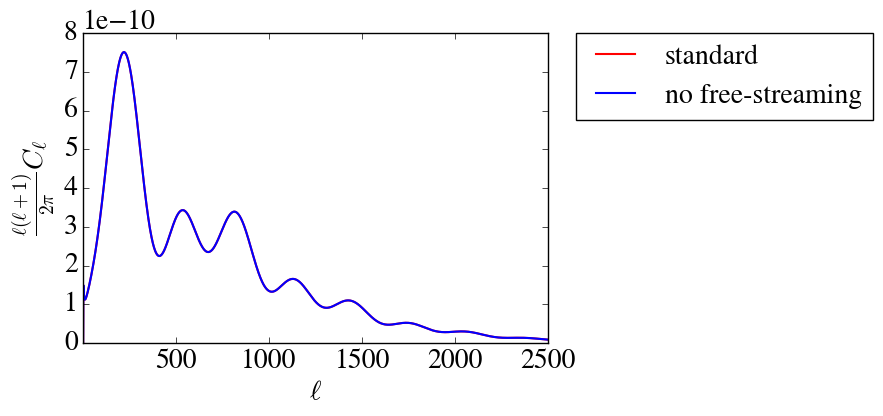

In [8]:
clStandard = Standard.raw_cl()
l = clStandard['ell']
clNoInt = NoInt.raw_cl()

plt.plot(l,l*(l+1)/(2.*np.pi)*clStandard['tt'],color="Red",lw=1.5,label="standard")
plt.plot(l,l*(l+1)/(2.*np.pi)*clNoInt['tt'],color="Blue",lw=1.5,label="no free-streaming")

plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\frac{\ell(\ell+1)}{2 \pi}C_\ell$")
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045)) 
#plt.savefig("Cls_freestreaming.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')